<a href="https://colab.research.google.com/github/shuvangiadhikari/Major-Project/blob/main/augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your folder
input_folder = '/content/drive/My Drive/Major Project/Preprocessed'  # Update this to your folder's path
output_folder = '/content/drive/My Drive/Major Project/Augmented'  # Folder to save augmented images

import cv2
import os
import numpy as np


Mounted at /content/drive


Image loaded successfully!


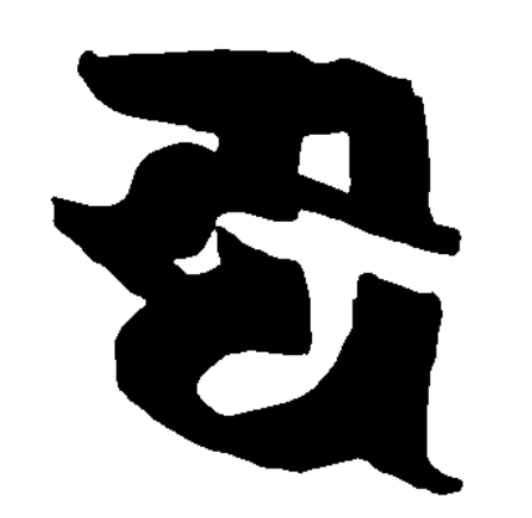

Image size: (518, 532, 3)


In [5]:
from google.colab.patches import cv2_imshow
import cv2

# Load your image
image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if image is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully!")
    cv2_imshow(image)  # Use this instead of cv2.imshow()

size_info = image.shape
print("Image size:", size_info)

Image loaded successfully!


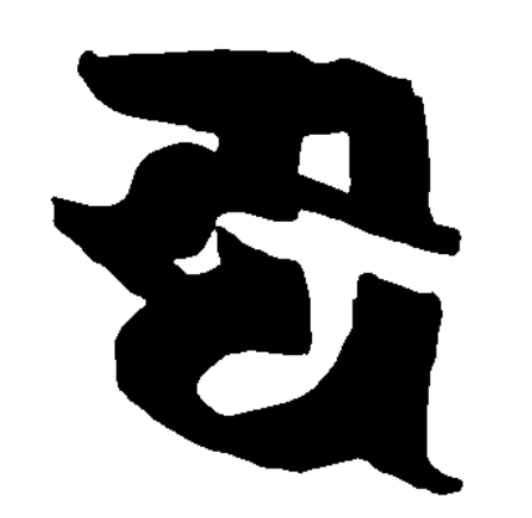

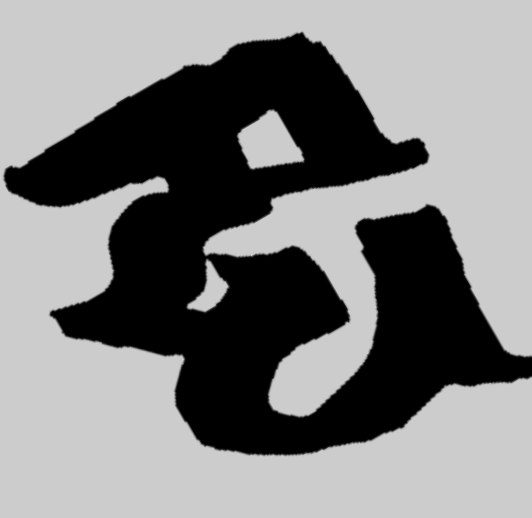

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def augment_image(image, angle=30, brightness_factor=0.8):
    """
    Rotates the image by a larger angle and adjusts brightness while keeping the background white.
    :param image: Input image (NumPy array)
    :param angle: Rotation angle in degrees
    :param brightness_factor: Factor to adjust brightness (1.0 = original brightness, <1.0 = dimmer, >1.0 = brighter)
    :return: Augmented image
    """
    # Get image dimensions
    h, w = image.shape[:2]

    # Rotation matrix
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)

    # Rotate with white background
    rotated = cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    # Adjust brightness
    brightened = cv2.convertScaleAbs(rotated, alpha=brightness_factor, beta=0)

    return brightened

# Load your image
image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if image is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully!")
    cv2_imshow(image)  # Use this instead of cv2.imshow()

    augmented_image = augment_image(image, angle=30, brightness_factor=0.8)

    # Display augmented image
    cv2_imshow(augmented_image)


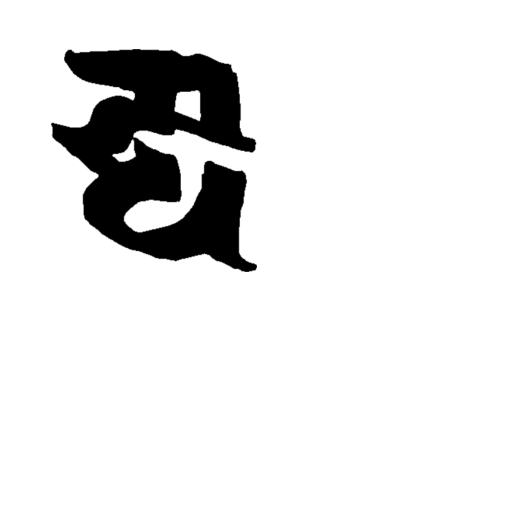

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def resize_character_in_image(image, scale_factor=0.5):
    """
    Resizes the character inside the image without resizing the whole image and sets the background to white.
    :param image: Input image (NumPy array)
    :param scale_factor: Factor to rescale the character (1.0 = no scaling)
    :return: Image with resized character and white background
    """
    # Create a white background image of the same size as the input image
    white_background = np.ones_like(image, dtype=np.uint8) * 255  # White background (255)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to get a binary image
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the character is the largest contour, find its bounding box
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Optionally, filter out small contours (noise)
        if w > 20 and h > 20:  # Threshold can be adjusted based on the image
            # Extract the character region
            char_roi = image[y:y+h, x:x+w]

            # Resize the character region
            new_w = int(w * scale_factor)
            new_h = int(h * scale_factor)
            resized_char = cv2.resize(char_roi, (new_w, new_h))

            # Place the resized character on the white background
            white_background[y:y+new_h, x:x+new_w] = resized_char

            return white_background

    # Return the white background with no character if no character was detected
    return white_background

# Load your image
image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if image is None:
    print("Error: Could not load image.")
else:
    # Resize the character in the image and set background to white
    resized_image = resize_character_in_image(image, scale_factor=0.5)

    # Display the resized image with character and white background
    cv2_imshow(resized_image)


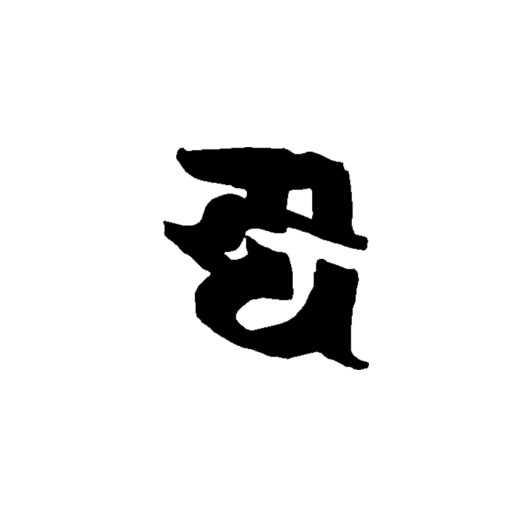

In [ ]:
""" Resizes the character inside the image, sets the background to white,
    and centers the resized character. """

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def resize_and_center_character(image, scale_factor=0.5):

    # Create a white background image of the same size as the input image
    white_background = np.ones_like(image, dtype=np.uint8) * 255  # White background (255)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to get a binary image
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the character is the largest contour, find its bounding box
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Optionally, filter out small contours (noise)
        if w > 20 and h > 20:  # Threshold can be adjusted based on the image
            # Extract the character region
            char_roi = image[y:y+h, x:x+w]

            # Resize the character region
            new_w = int(w * scale_factor)
            new_h = int(h * scale_factor)
            resized_char = cv2.resize(char_roi, (new_w, new_h))

            # Calculate the top-left corner to center the resized character
            h_bg, w_bg = white_background.shape[:2]
            x_offset = (w_bg - new_w) // 2
            y_offset = (h_bg - new_h) // 2

            # Place the resized character on the white background, centered
            white_background[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized_char

            return white_background

    # Return the white background with no character if no character was detected
    return white_background

# Load your image
image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if image is None:
    print("Error: Could not load image.")
else:
    # Resize and center the character in the image
    centered_image = resize_and_center_character(image, scale_factor=0.5)

    # Display the centered resized image
    cv2_imshow(centered_image)


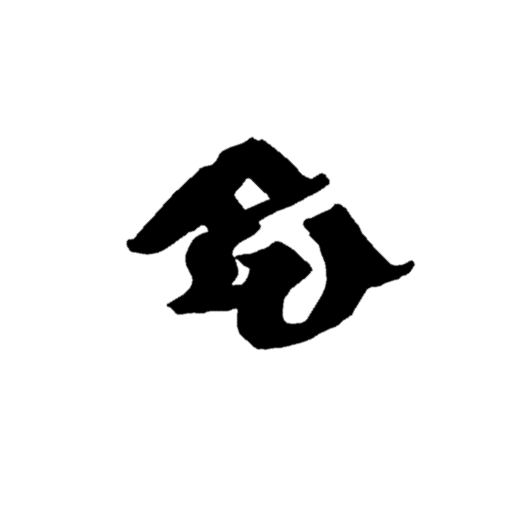

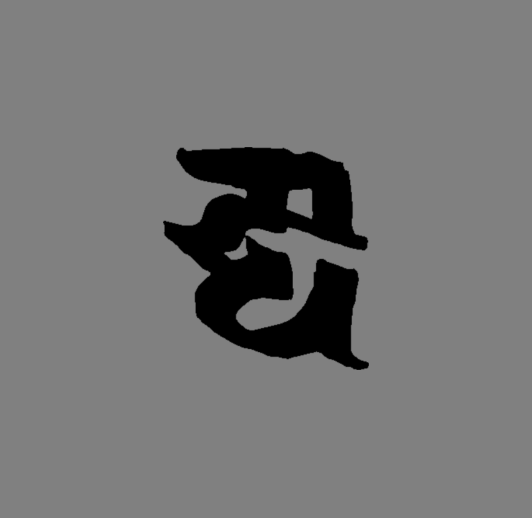

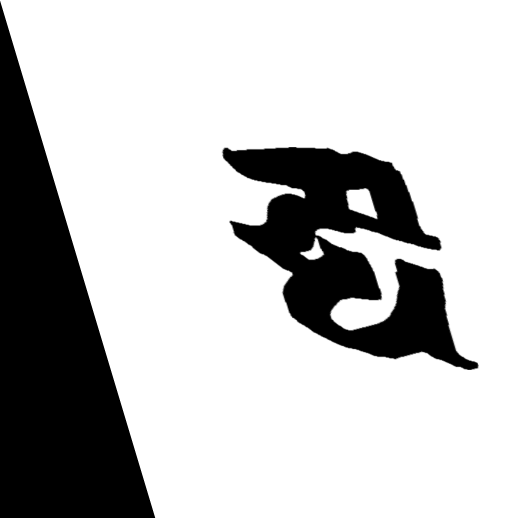

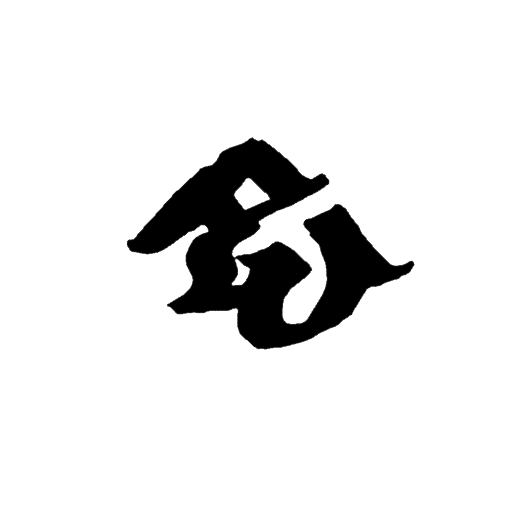

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Rotation Function
def rotate_image(image, angle=30):
    """
    Rotates the image by a given angle.
    :param image: Input image (NumPy array)
    :param angle: Rotation angle in degrees
    :return: Rotated image
    """
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)  # Rotation matrix
    rotated_image = cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
    return rotated_image

# Brightness Adjustment Function (Dimmer)
def dim_brightness(image, factor=0.7):
    """
    Dim the brightness of the image.
    :param image: Input image (NumPy array)
    :param factor: Factor by which to dim the brightness (1.0 = original, < 1.0 = dimmer)
    :return: Image with adjusted brightness
    """
    dimmed_image = cv2.convertScaleAbs(image, alpha=factor, beta=0)  # Dim the brightness
    return dimmed_image

# Shearing Function (Compress Image)
def shear_image(image, shear_factor=0.5):
    """
    Shear the image horizontally to compress it.
    :param image: Input image (NumPy array)
    :param shear_factor: Factor by which to shear (compress horizontally)
    :return: Sheared image
    """
    h, w = image.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])  # Horizontal shearing matrix
    sheared_image = cv2.warpAffine(image, M, (w, h))
    return sheared_image

# Rotate and Brightness Adjustment Function (Rotate + Brighter)
def rotate_and_brighten(image, angle=30, brightness_factor=1.2):
    """
    Rotate the image and increase its brightness.
    :param image: Input image (NumPy array)
    :param angle: Rotation angle in degrees
    :param brightness_factor: Factor to adjust brightness (1.0 = original, >1.0 = brighter)
    :return: Rotated and brightened image
    """
    rotated_image = rotate_image(image, angle)  # Rotate the image
    brightened_image = cv2.convertScaleAbs(rotated_image, alpha=brightness_factor, beta=0)  # Brighten the rotated image
    return brightened_image


# Testing with the centered image
image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if image is None:
    print("Error: Could not load image.")
else:
    # Resize and center the character in the image
    centered_image = resize_and_center_character(image, scale_factor=0.5)

    # Apply transformations
    rotated_image = rotate_image(centered_image, angle=45)
    cv2_imshow(rotated_image)

    dimmed_image = dim_brightness(centered_image, factor=0.5)
    cv2_imshow(dimmed_image)

    sheared_image = shear_image(centered_image, shear_factor=0.3)
    cv2_imshow(sheared_image)

    rotated_and_brightened_image = rotate_and_brighten(centered_image, angle=45, brightness_factor=1.5)
    cv2_imshow(rotated_and_brightened_image)


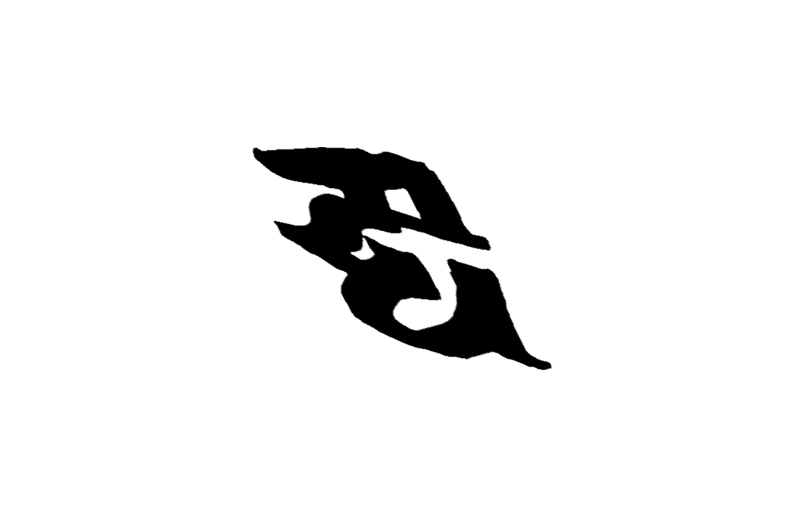

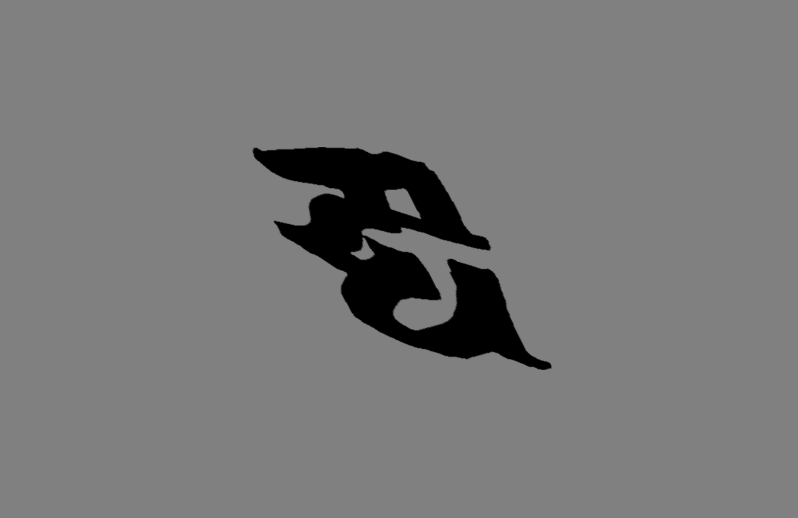

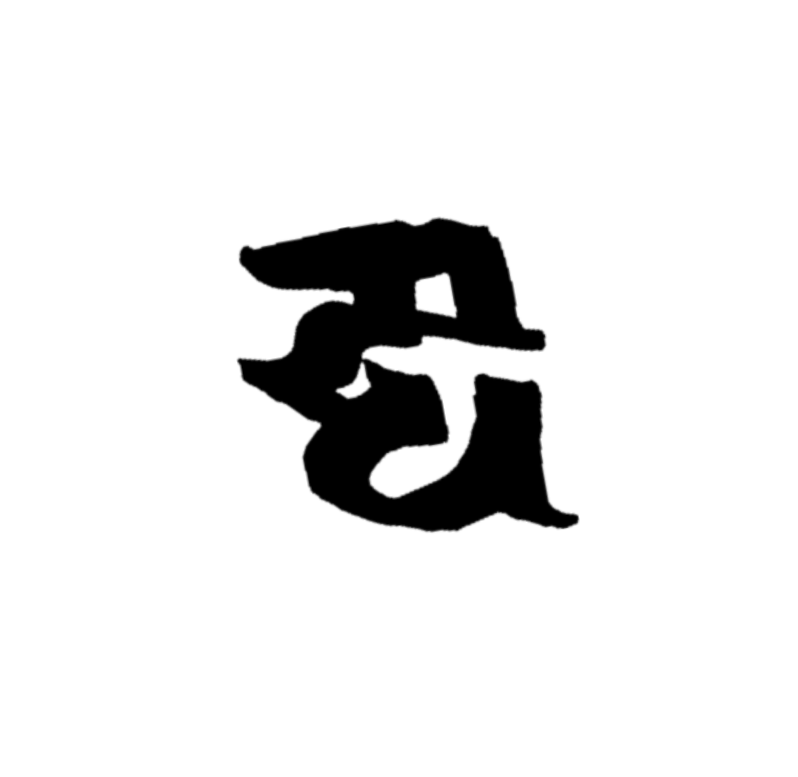

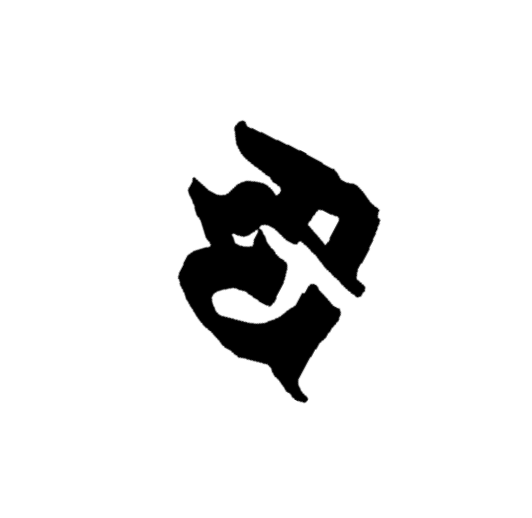

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random

# Shearing Function with White Background (wider shearing)
def shear_image_with_white_background(image, shear_factor=0.5):
    """
    Shear the image horizontally to compress it with a white background.
    :param image: Input image (NumPy array)
    :param shear_factor: Factor by which to shear (make the image wider)
    :return: Sheared image with a white background
    """
    h, w = image.shape[:2]

    # Shearing matrix to make the image wider
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])

    # Create a white background image
    white_background = np.ones_like(image, dtype=np.uint8) * 255

    # Apply the shear transformation
    sheared_image = cv2.warpAffine(image, M, (int(w + shear_factor * w), h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    return sheared_image

# Shearing to make it wider and dim brightness
def shear_and_dim(image, shear_factor=0.5, brightness_factor=0.5):
    """
    Shear the image to make it wider and dim the brightness.
    :param image: Input image (NumPy array)
    :param shear_factor: Factor by which to shear (make it wider)
    :param brightness_factor: Factor to dim the brightness
    :return: Sheared image with dimmed brightness
    """
    sheared_image = shear_image_with_white_background(image, shear_factor)
    dimmed_image = cv2.convertScaleAbs(sheared_image, alpha=brightness_factor, beta=0)
    return dimmed_image

# Make the size bigger and rotate it slightly
def resize_and_rotate(image, scale_factor=1.5, angle=10):
    """
    Make the image size bigger and rotate it slightly.
    :param image: Input image (NumPy array)
    :param scale_factor: Factor to resize the image
    :param angle: Rotation angle in degrees
    :return: Resized and rotated image
    """
    # Resize the image
    h, w = image.shape[:2]
    new_w = int(w * scale_factor)
    new_h = int(h * scale_factor)
    resized_image = cv2.resize(image, (new_w, new_h))

    # Rotate the resized image
    center = (new_w // 2, new_h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(resized_image, M, (new_w, new_h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    return rotated_image

# Random Augmentation Function
def random_augmentation(image):
    """
    Apply a random combination of transformations (rotation, scaling, brightness adjustment).
    :param image: Input image (NumPy array)
    :return: Augmented image with random transformations
    """
    # Randomly choose a transformation
    transformations = [
        lambda img: rotate_image(img, angle=random.randint(-30, 30)),
        lambda img: cv2.resize(img, (random.randint(100, 200), random.randint(100, 200))),
        lambda img: cv2.convertScaleAbs(img, alpha=random.uniform(0.5, 1.5), beta=0)
    ]

    # Randomly select a transformation to apply
    augmentation_function = random.choice(transformations)
    augmented_image = augmentation_function(image)

    return augmented_image


# Example with centered image
image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if image is None:
    print("Error: Could not load image.")
else:
    # Resize and center the character in the image
    centered_image = resize_and_center_character(image, scale_factor=0.5)

    # Apply shearing with white background
    sheared_image = shear_image_with_white_background(centered_image, shear_factor=0.5)
    cv2_imshow(sheared_image)

    # Apply shearing to make it wider and dim brightness
    sheared_and_dimmed_image = shear_and_dim(centered_image, shear_factor=0.5, brightness_factor=0.5)
    cv2_imshow(sheared_and_dimmed_image)

    # Apply resize and rotate (make size bigger and rotate slightly)
    resized_and_rotated_image = resize_and_rotate(centered_image, scale_factor=1.5, angle=10)
    cv2_imshow(resized_and_rotated_image)

    # Apply random augmentation
    augmented_image = random_augmentation(centered_image)
    cv2_imshow(augmented_image)


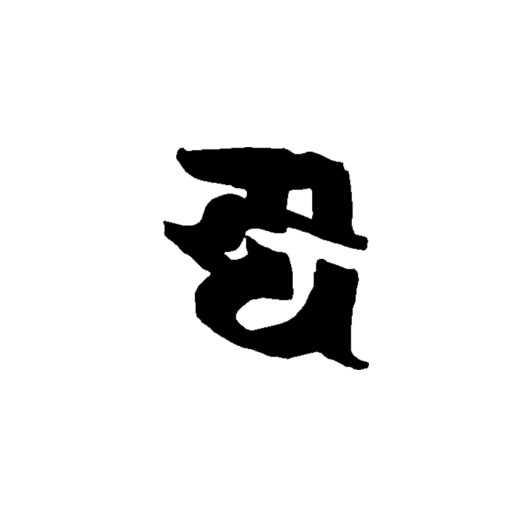

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def resize_and_center_character(image, scale_factor=0.5):

    # Create a white background image of the same size as the input image
    white_background = np.ones_like(image, dtype=np.uint8) * 255  # White background (255)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to get a binary image
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the character is the largest contour, find its bounding box
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Optionally, filter out small contours (noise)
        if w > 20 and h > 20:  # Threshold can be adjusted based on the image
            # Extract the character region
            char_roi = image[y:y+h, x:x+w]

            # Resize the character region
            new_w = int(w * scale_factor)
            new_h = int(h * scale_factor)
            resized_char = cv2.resize(char_roi, (new_w, new_h))

            # Calculate the top-left corner to center the resized character
            h_bg, w_bg = white_background.shape[:2]
            x_offset = (w_bg - new_w) // 2
            y_offset = (h_bg - new_h) // 2

            # Place the resized character on the white background, centered
            white_background[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized_char

            # Save the resized character image
            resized_character = white_background.copy()

            return resized_character

    # Return the white background with no character if no character was detected
    return white_background

# Load your image
image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if image is None:
    print("Error: Could not load image.")
else:
    # Resize and center the character in the image
    resized_character = resize_and_center_character(image, scale_factor=0.5)

    # Display the resized and centered character image
    cv2_imshow(resized_character)



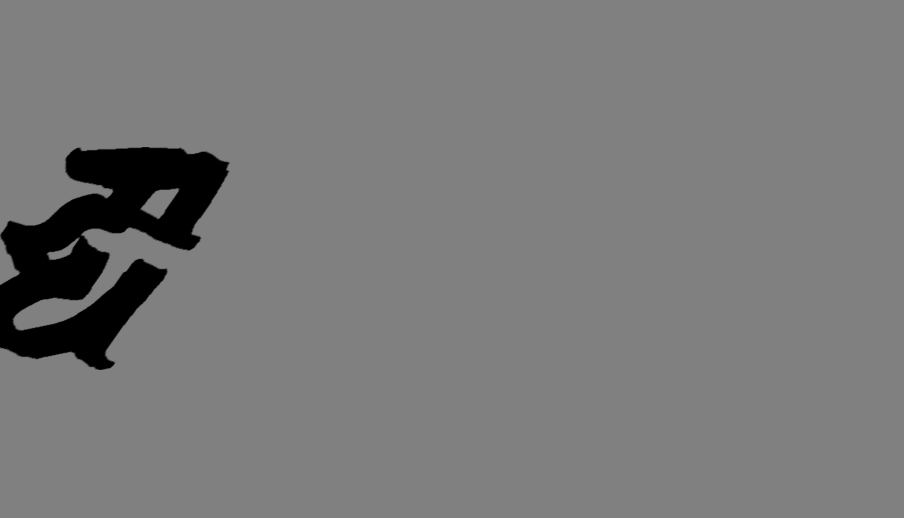

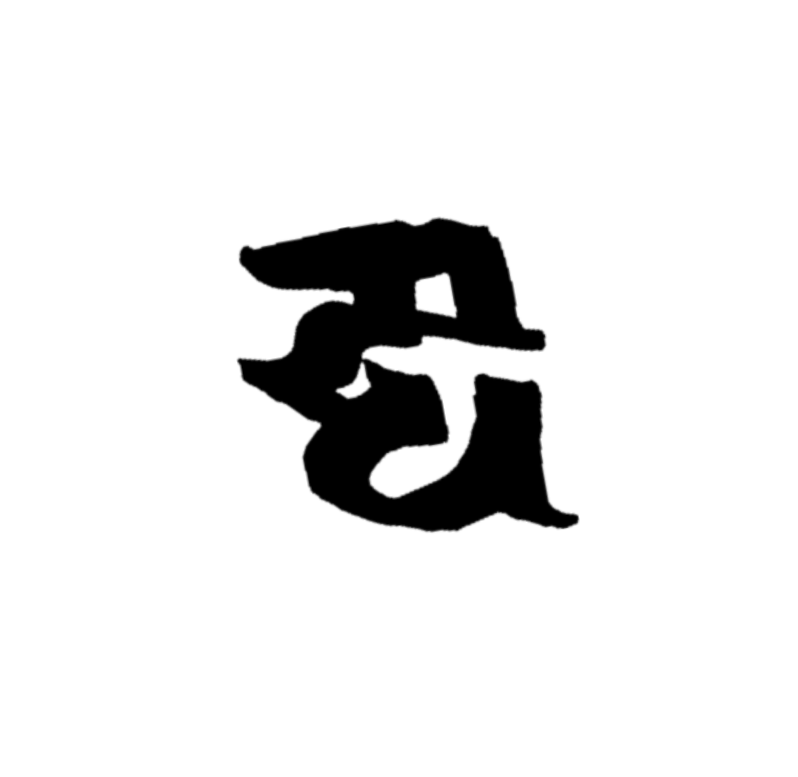

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random

# Shearing Function with White Background (thinner shearing)
def shear_image_with_white_background(image, shear_factor=0.5):
    """
    Shear the image horizontally to compress it with a white background.
    :param image: Input image (NumPy array)
    :param shear_factor: Factor by which to shear (make the image thinner)
    :return: Sheared image with a white background
    """
    h, w = image.shape[:2]

    # Shearing matrix to make the image thinner
    M = np.float32([[1, -shear_factor, 0], [0, 1, 0]])

    # Create a white background image
    white_background = np.ones_like(image, dtype=np.uint8) * 255

    # Apply the shear transformation
    sheared_image = cv2.warpAffine(image, M, (int(w + shear_factor * w), h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    return sheared_image

# Shearing to make it thinner and dim brightness
def shear_and_dim(image, shear_factor=0.3, brightness_factor=0.5):
    """
    Shear the image to make it thinner and dim the brightness.
    :param image: Input image (NumPy array)
    :param shear_factor: Factor by which to shear (make it thinner)
    :param brightness_factor: Factor to dim the brightness
    :return: Sheared image with dimmed brightness
    """
    sheared_image = shear_image_with_white_background(image, shear_factor)
    dimmed_image = cv2.convertScaleAbs(sheared_image, alpha=brightness_factor, beta=0)
    return dimmed_image

# Make the size bigger and rotate it slightly
def resize_and_rotate(image, scale_factor=1.5, angle=10):
    """
    Make the image size bigger and rotate it slightly.
    :param image: Input image (NumPy array)
    :param scale_factor: Factor to resize the image
    :param angle: Rotation angle in degrees
    :return: Resized and rotated image
    """
    # Resize the image
    h, w = image.shape[:2]
    new_w = int(w * scale_factor)
    new_h = int(h * scale_factor)
    resized_image = cv2.resize(image, (new_w, new_h))

    # Rotate the resized image
    center = (new_w // 2, new_h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(resized_image, M, (new_w, new_h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    return rotated_image

# Example with centered image
image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if image is None:
    print("Error: Could not load image.")
else:
    # Resize and center the character in the image
    centered_image = resize_and_center_character(image, scale_factor=0.5)

    # Apply shearing to make it thinner and dim brightness
    sheared_and_dimmed_image = shear_and_dim(centered_image, shear_factor=0.7, brightness_factor=0.5)
    cv2_imshow(sheared_and_dimmed_image)

    # Apply resize and rotate (make size bigger and rotate slightly)
    resized_and_rotated_image = resize_and_rotate(centered_image, scale_factor=1.5, angle=10)
    cv2_imshow(resized_and_rotated_image)
